In [59]:
import numpy as np
import pandas as pd
import os

import seaborn as sns
from matplotlib import pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', size='20')

In [83]:
# Warning 무시
import warnings
warnings.filterwarnings(action='ignore')

# 1. 데이터 로딩 및 변수 추가

In [24]:
# 데이터 불러오기

file_list = os.listdir('./data/')
file_list

all_data = pd.DataFrame([])
for file in file_list:
    data = pd.read_csv("./data/"+file)
    
    if 'OK' in file:
        data['OK/NG'] = np.zeros([len(data)])
    else:
        data['OK/NG'] = np.ones([len(data)])
    
    all_data = pd.concat([all_data, data])

all_data = all_data.reset_index()

# CMP_NM과 CMP_NM1 column 결합
temp = all_data[['CMP_NM', 'CMP_NM1']].fillna("")
all_data['CMP_NM'] = temp['CMP_NM'] + " " + temp['CMP_NM1']
all_data = all_data.drop(['Unnamed: 0', 'index', 'CMP_NM1'], axis=1)

all_data

,BIZ_NO,CMP_PFIX_NM,CMP_NM,CMP_SFIX_NM,CMP_ENM,BZ_TYP,CMP_SCL,PBCO_GB,PSN_CORP_GB,HDOF_BR_GB,...,부채총계대 매출액(%),총자본회전율(회),재고자산회전율(회),매출채권회전율(회),매입채무회전율(회),미수금,매출원가,무형자산,재고자산,OK/NG
0,1068179240,(주),석정미디어,NaN,sung jung,M,2.0,2.0,1.0,1.0,...,2.649000e+01,1.748000e+00,3.803595e+03,3.086000e+00,2.716000e+01,NaN,277518.0,NaN,NaN,1.0
1,6068136800,(주),신한스틸,NaN,"SINHAN STEEL CO.,LTD.",M,2.0,2.0,1.0,1.0,...,3.581600e+01,1.673000e+00,5.072000e+00,5.022000e+00,1.355500e+01,493590.0,49558649.0,1467.0,10936877.0,1.0
2,6108166244,(주),아이티스타,NaN,"IT star CO., Ltd.",M,2.0,2.0,1.0,1.0,...,9.251600e+01,5.600000e-01,1.000000e+12,1.000000e+12,1.000000e+12,NaN,NaN,NaN,NaN,1.0
3,1248627594,(주),세주상사,NaN,THE SEJOO CORPORATION,M,2.0,2.0,1.0,1.0,...,1.000000e+12,1.000000e+12,1.000000e+12,1.000000e+12,1.000000e+12,3881.0,1631731.0,NaN,70847.0,1.0
4,1348117991,NaN,한국건드릴,(주),"HAN KOOK GUNDRILL CO,LTD.",M,2.0,2.0,1.0,1.0,...,2.782150e+02,1.580000e-01,1.405000e+00,5.439000e+00,1.044200e+01,44588.0,3996618.0,182.0,2553358.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95343,8048101453,NaN,제이앤인베스트먼트,NaN,J&INVESTMENT,M,2.0,2.0,1.0,1.0,...,7.730580e+02,1.000000e+12,1.000000e+12,1.000000e+12,1.000000e+12,1885.0,NaN,NaN,NaN,0.0
95344,8028701430,NaN,디앤엠개발,(주),"DNM Development Co., Ltd.",M,2.0,2.0,1.0,1.0,...,6.806863e+03,1.000000e+12,1.000000e+12,1.000000e+12,1.000000e+12,69283.0,NaN,NaN,NaN,0.0
95345,4268501421,NaN,마스비 건축연구소,NaN,NaN,M,2.0,2.0,1.0,2.0,...,9.401000e+00,1.146000e+00,1.234200e+01,7.905000e+00,1.529400e+01,41983.0,29865349.0,NaN,2731329.0,0.0
95346,6518502462,(주),건설레미콘의정부공장,NaN,"Construction Remicon Uijeongbu Factory Co., Ltd.",M,2.0,2.0,1.0,2.0,...,3.792500e+01,4.100000e-01,3.754700e+01,8.578000e+00,7.717000e+00,347057.0,17622149.0,NaN,689730.0,0.0


In [25]:
# 추가 Feature
all_data['이자보상배율'] = all_data['영업이익（손실）'] / (all_data['금융비용대부채비율(%)'] * all_data['부  채  총  계'])
all_data['매출액대비자산'] = (all_data['매출채권'] + all_data['재고자산']) / all_data['매출액'] * 100
all_data['비유동장기적합률'] = all_data['비유동자산'] / (all_data['자기자본비율(%)'] * all_data['자본총계'] / 100 + all_data['비유동부채']) * 100
all_data['자기자본순이익률'] = all_data['당기순이익(손실)'] / (all_data['자기자본비율(%)'] * all_data['자산총계'] / 100) * 100
all_data['유동비율'] = all_data['유동자산'] / all_data['유동부채'] * 100
all_data['총자본순이익률'] = all_data['당기순이익(손실)'] / all_data['자산총계'] * 100
all_data['금융비용대총자산'] = all_data['금융비용대부채비율(%)'] * all_data['부  채  총  계'] / all_data['자산총계']
all_data['당좌비율'] = (all_data['유동자산'] - all_data['재고자산']) / all_data['유동부채'] * 100

# 2. 데이터 EDA

In [27]:
# 데이터 Null 확인
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95348 entries, 0 to 95347
Data columns (total 88 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   BIZ_NO           95348 non-null  int64  
 1   CMP_PFIX_NM      61991 non-null  object 
 2   CMP_NM           95348 non-null  object 
 3   CMP_SFIX_NM      31358 non-null  object 
 4   CMP_ENM          95292 non-null  object 
 5   BZ_TYP           95348 non-null  object 
 6   CMP_SCL          95348 non-null  float64
 7   PBCO_GB          95348 non-null  float64
 8   PSN_CORP_GB      95348 non-null  float64
 9   HDOF_BR_GB       95348 non-null  float64
 10  FR_IVST_CORP_YN  95348 non-null  object 
 11  VENT_YN          95348 non-null  object 
 12  LIST_CD          356 non-null    object 
 13  IND_CD_ORDR      95336 non-null  float64
 14  IND_CD1          95283 non-null  float64
 15  IND_CD2          4688 non-null   float64
 16  IND_CD3          1002 non-null   float64
 17  PB_ORG_TYP  

In [28]:
# 전체 부도 비율
all_data['OK/NG'].sum()/all_data.shape[0]

0.01916138775852666

In [33]:
# 비즈니스 타입별 OK 수
dd = all_data.groupby(['BZ_TYP','OK/NG']).size().unstack().fillna(0)
dd = dd.reset_index()
dd.columns = ['BZ_TYP', 'OK', 'NG']
dd

,BZ_TYP,OK,NG
0,B,1.0,0.0
1,M,93301.0,1827.0
2,O,211.0,0.0
3,V,8.0,0.0


In [34]:
# BZ_TYP이 M인 회사에 대한 부도 비율
all_data_M = all_data[all_data.BZ_TYP == 'M']
all_data_M['OK/NG'].sum()/all_data_M.shape[0]

0.019205701791270707

In [36]:
# 범주형 변수 OK/NG 차이 확인
for n_n in all_data.columns[7:12]:
    print(n_n)
    print(all_data[n_n].unique())

PBCO_GB
[2. 1.]
PSN_CORP_GB
[1.]
HDOF_BR_GB
[1. 2.]
FR_IVST_CORP_YN
['N' 'Y']
VENT_YN
['N' 'Y']


C:\Users\MOBIS\Anaconda3\envs\test\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


OK/NG,0.0,1.0
PBCO_GB,,
1.0,27.0,0.0
2.0,93494.0,1827.0


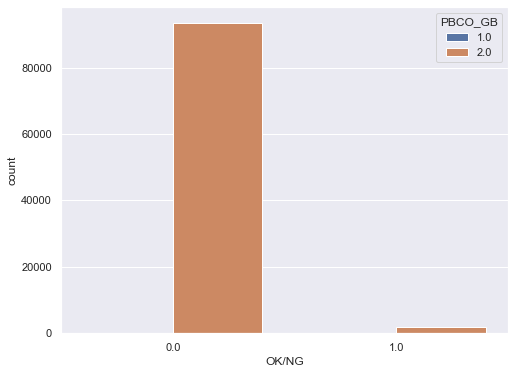

In [48]:
# PBCO_GB OK/NG 개수 확인
sns.set(rc={'figure.figsize':(8,6)})
sns.countplot('OK/NG', hue='PBCO_GB', data=all_data)

all_data.groupby(['PBCO_GB','OK/NG']).size().unstack().fillna(0)

C:\Users\MOBIS\Anaconda3\envs\test\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


OK/NG,0.0,1.0
HDOF_BR_GB,,
1.0,89909,1473
2.0,3612,354


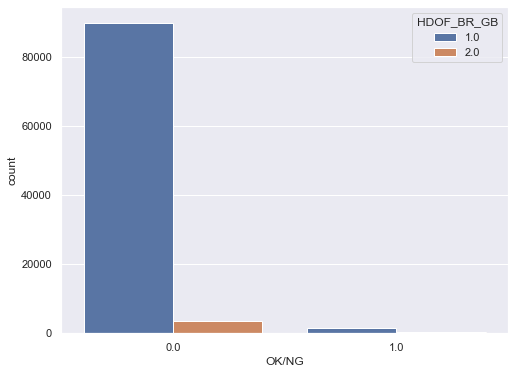

In [47]:
# HDOF_BR_GB OK/NG 개수 확인
sns.set(rc={'figure.figsize':(8,6)})
sns.countplot('OK/NG', hue='HDOF_BR_GB', data=all_data)

all_data.groupby(['HDOF_BR_GB','OK/NG']).size().unstack().fillna(0)

C:\Users\MOBIS\Anaconda3\envs\test\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


OK/NG,0.0,1.0
FR_IVST_CORP_YN,,
N,88512,1769
Y,5009,58


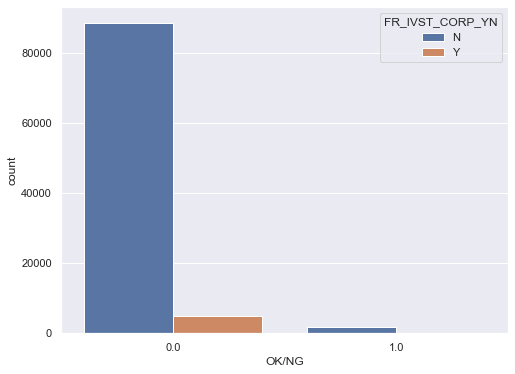

In [46]:
# FR_IVST_CORP_YN OK/NG 개수 확인
sns.set(rc={'figure.figsize':(8,6)})
sns.countplot('OK/NG', hue='FR_IVST_CORP_YN', data=all_data)

all_data.groupby(['FR_IVST_CORP_YN','OK/NG']).size().unstack().fillna(0)

C:\Users\MOBIS\Anaconda3\envs\test\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


OK/NG,0.0,1.0
VENT_YN,,
N,82593,1706
Y,10928,121


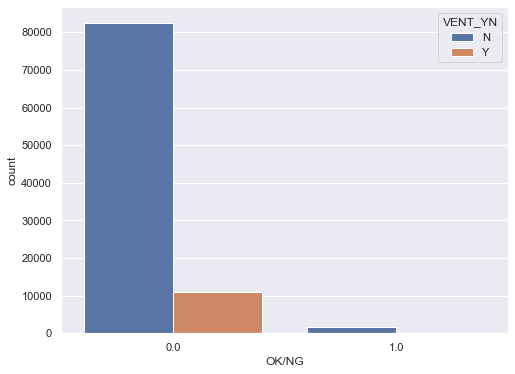

In [45]:
# VENT_YN OK/NG 개수 확인
sns.set(rc={'figure.figsize':(8,6)})
sns.countplot('OK/NG', hue='VENT_YN', data=all_data)

all_data.groupby(['VENT_YN','OK/NG']).size().unstack().fillna(0)

In [49]:
# 재무 관련 feature 분포 확인
log_cols = ['유동자산', '매출채권', '비유동자산', '유형자산', '자산총계', '유동부채','비유동부채', '부  채  총  계','자본금', '이익잉여금(결손금）',
       '자본총계', '매출액', '판매비와관리비', '영업이익（손실）', '자본금','매출원가', '무형자산', '재고자산']
all_data[log_cols].describe()

,유동자산,매출채권,비유동자산,유형자산,자산총계,유동부채,비유동부채,부 채 총 계,자본금,이익잉여금(결손금）,자본총계,매출액,판매비와관리비,영업이익（손실）,자본금,매출원가,무형자산,재고자산
count,9.534800e+04,8.086500e+04,9.458400e+04,9.023900e+04,9.534800e+04,9.524600e+04,8.790100e+04,9.529800e+04,9.532800e+04,9.516100e+04,9.534000e+04,9.153500e+04,9.507100e+04,9.527600e+04,9.532800e+04,8.129600e+04,4.984100e+04,7.138400e+04
mean,1.604581e+07,4.451015e+06,1.997603e+07,1.418700e+07,3.602697e+07,1.351345e+07,1.090602e+07,2.356561e+07,2.425646e+06,6.251217e+06,1.247476e+07,2.664972e+07,4.445947e+06,1.277135e+06,2.425646e+06,2.328733e+07,1.192421e+06,7.133793e+06
std,4.228755e+07,1.838491e+07,5.659614e+07,4.648395e+07,9.378755e+07,3.985765e+07,5.232167e+07,7.693469e+07,9.268407e+06,2.587502e+07,3.310470e+07,8.675471e+07,9.211901e+06,7.200086e+06,9.268407e+06,8.549050e+07,1.351091e+07,2.705124e+07
min,-3.793700e+04,-5.421180e+05,-1.964740e+05,-4.939030e+05,-3.793700e+04,-2.294400e+05,-3.937139e+06,0.000000e+00,-1.414399e+06,-1.827017e+09,-8.191104e+08,-4.725711e+07,-2.271545e+07,-2.138522e+08,-1.414399e+06,-2.582984e+07,-8.437400e+04,-3.006420e+05
25%,4.080220e+06,8.471260e+05,4.167618e+06,1.643792e+06,1.385471e+07,3.408118e+06,9.886240e+05,7.267852e+06,3.000000e+05,1.071000e+04,2.357665e+06,7.899012e+06,1.122785e+06,-3.860025e+04,3.000000e+05,7.043598e+06,5.800000e+03,6.266142e+05
50%,8.805474e+06,2.311370e+06,1.036208e+07,7.349640e+06,2.116780e+07,7.526920e+06,3.350555e+06,1.260500e+07,7.000000e+05,3.474097e+06,6.657701e+06,1.726599e+07,2.259537e+06,5.872725e+05,7.000000e+05,1.479545e+07,4.812400e+04,2.162030e+06
75%,1.720991e+07,5.045115e+06,1.996965e+07,1.504412e+07,3.733419e+07,1.431671e+07,8.493704e+06,2.280584e+07,1.762000e+06,1.030519e+07,1.463425e+07,3.313025e+07,4.580030e+06,1.742881e+06,1.762000e+06,2.864861e+07,3.077350e+05,5.972040e+06
max,5.369207e+09,3.277190e+09,1.002787e+10,1.001807e+10,1.595357e+10,8.486639e+09,1.047097e+10,1.406726e+10,6.168757e+08,1.750143e+09,3.555694e+09,2.274372e+10,6.141103e+08,6.502375e+08,6.168757e+08,2.177195e+10,1.146774e+09,3.821756e+09


In [50]:
# 금액은 로그로 단위변환
for name in log_cols:
    all_data['log_'+name] = np.log(all_data[name])

C:\Users\MOBIS\Anaconda3\envs\test\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\MOBIS\Anaconda3\envs\test\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


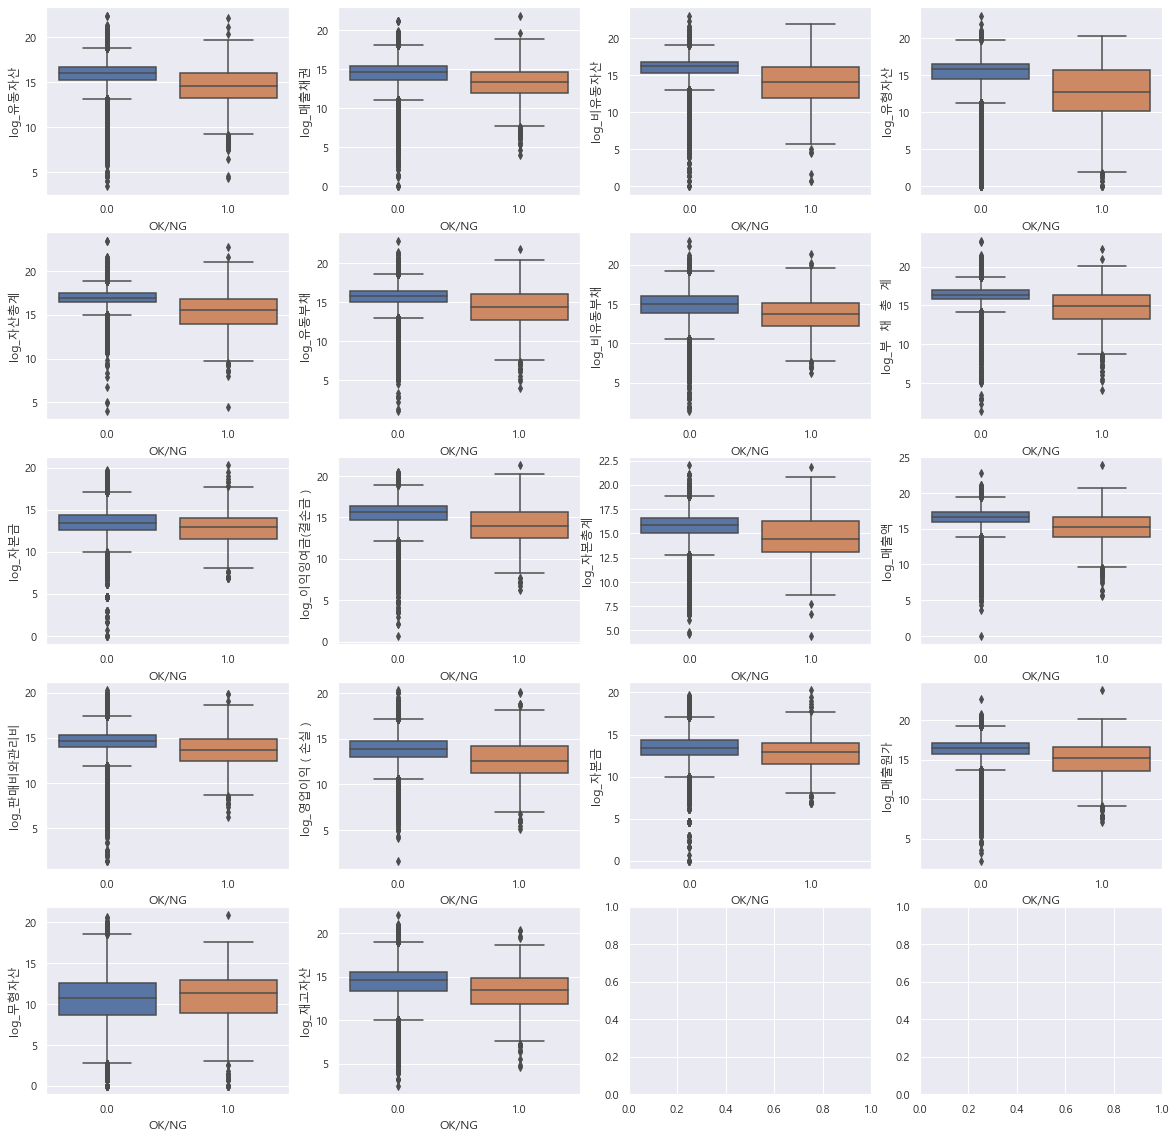

In [64]:
# 재무 데이터 OK/NG 별 분포 시각화 1
plt.rc('font', family='Malgun Gothic')
fig, axes = plt.subplots(5, 4, figsize=(20,20))


y = 0
for c_n in log_cols:
    i, j = divmod(y, 4)
    sns.boxplot(x=all_data["OK/NG"], y=all_data['log_'+c_n], ax=axes[i, j])
    y = y + 1

<AxesSubplot:>

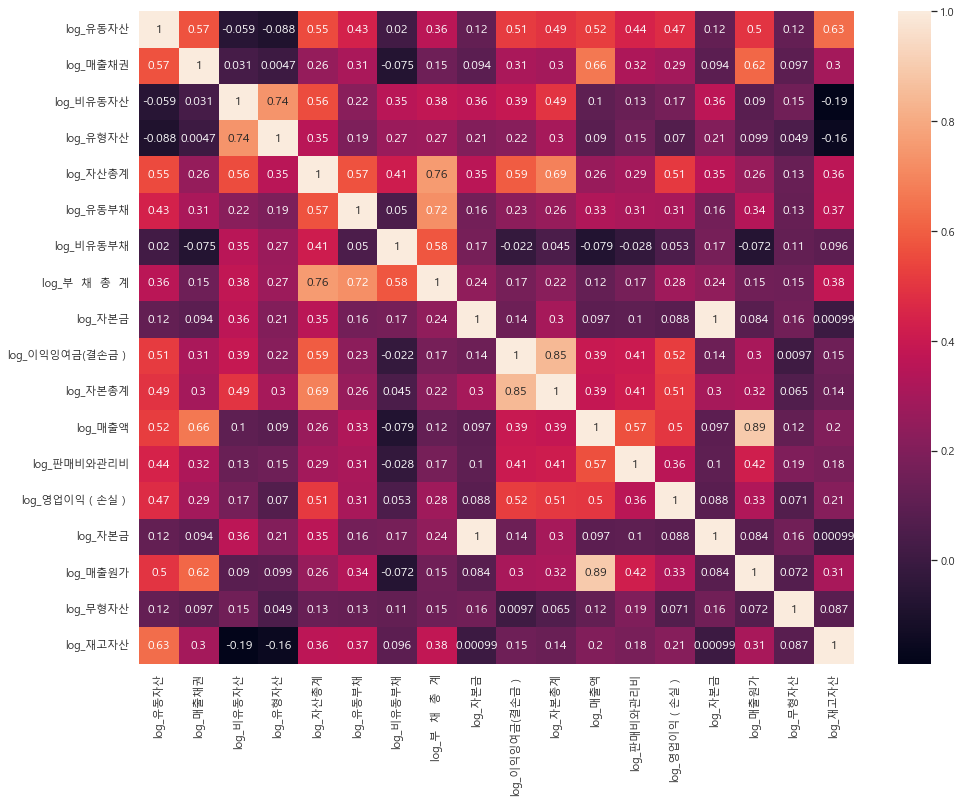

In [75]:
# 재무 데이터 간 상관계수 시각화 1

sns.set(rc={'figure.figsize':(16,12)})
plt.rc('font', family='Malgun Gothic')
sns.heatmap(all_data[['log_'+s for s in log_cols]].corr(),annot=True)

In [77]:
# 재무 관련 feature 분포 확인 2 
# '%'가 포함된 feature만 확인
all_data[all_data.columns[51:70]].describe()

,기업순이익률(%),유보액/총자산(%),유보액/납입자본(%),매출액총이익률(%),매출액영업이익률(%),매출액순이익률(%),수지비율(%),경상수지비율,영업비율(%),금융비용대매출액비율(%,금융비용대부채비율(%),금융비용대총비용비율(%,부채비율(%),차입금의존도(%),자기자본비율(%),순운전자본비율(%),유동부채비율(%),비유동부채비율(%),부채총계대 매출액(%)
count,9.534800e+04,9.534600e+04,9.534400e+04,9.491500e+04,9.491600e+04,9.491400e+04,9.532400e+04,9.107000e+04,9.491500e+04,9.384500e+04,9.534600e+04,9.417000e+04,9.534700e+04,9.514700e+04,9.534800e+04,9.534800e+04,9.534100e+04,9.476000e+04,9.491800e+04
mean,5.740026e+10,2.307386e+09,2.496075e+09,3.748617e+10,3.735935e+10,3.742335e+10,1.877898e+09,3.010318e+11,3.916136e+10,1.227663e+11,4.059950e+10,9.487098e+10,9.537794e+10,1.005076e+11,1.738893e+11,2.097580e+07,1.744370e+11,2.315217e+11,4.205742e+10
std,2.326070e+11,4.798006e+10,4.990011e+10,1.899509e+11,1.896418e+11,1.897979e+11,4.329318e+10,4.586540e+11,1.939797e+11,3.281705e+11,1.973616e+11,2.930382e+11,2.937378e+11,3.006772e+11,3.790163e+11,4.579910e+09,3.794868e+11,4.218072e+11,1.934752e+11
min,-1.539469e+03,-2.664213e+04,-5.786405e+09,-3.010009e+06,-3.215937e+06,-4.565132e+06,-1.015134e+04,-5.299479e+10,-1.703433e+03,-3.206160e+02,0.000000e+00,-7.802300e+01,0.000000e+00,0.000000e+00,0.000000e+00,-1.352110e+04,-2.223000e+00,-3.123000e+00,-7.743300e+03
25%,1.113750e+00,2.840250e+00,4.049350e+01,1.137700e+01,4.830000e-01,-7.000000e-02,9.153700e+01,-4.562175e+05,9.021650e+01,5.290000e-01,8.000000e-01,5.370000e-01,7.629750e+01,2.636850e+01,2.855200e+01,-1.310700e+01,4.417200e+01,1.498675e+01,3.155125e+01
50%,4.061500e+00,2.349550e+01,5.704385e+02,2.177300e+01,4.100000e+00,2.678500e+00,9.739100e+01,1.099975e+02,9.652000e+01,1.793000e+00,1.912000e+00,1.757000e+00,1.890070e+02,4.952800e+01,4.803900e+01,7.300000e+00,1.197480e+02,6.732150e+01,6.981500e+01
75%,9.595000e+00,4.838950e+01,2.084336e+03,4.820400e+01,1.180000e+01,8.746750e+00,1.020010e+02,1.000000e+12,1.005320e+02,1.308700e+01,2.941000e+00,1.024075e+01,5.214210e+02,7.572600e+01,8.141725e+01,3.181050e+01,4.096000e+02,7.991070e+02,2.399652e+02
max,1.000000e+12,1.000000e+12,1.000000e+12,1.000000e+12,1.000000e+12,1.000000e+12,1.000000e+12,1.000000e+12,1.000000e+12,1.000000e+12,1.000000e+12,1.000000e+12,1.000000e+12,1.000000e+12,1.000000e+12,1.000000e+12,1.000000e+12,1.000000e+12,1.000000e+12


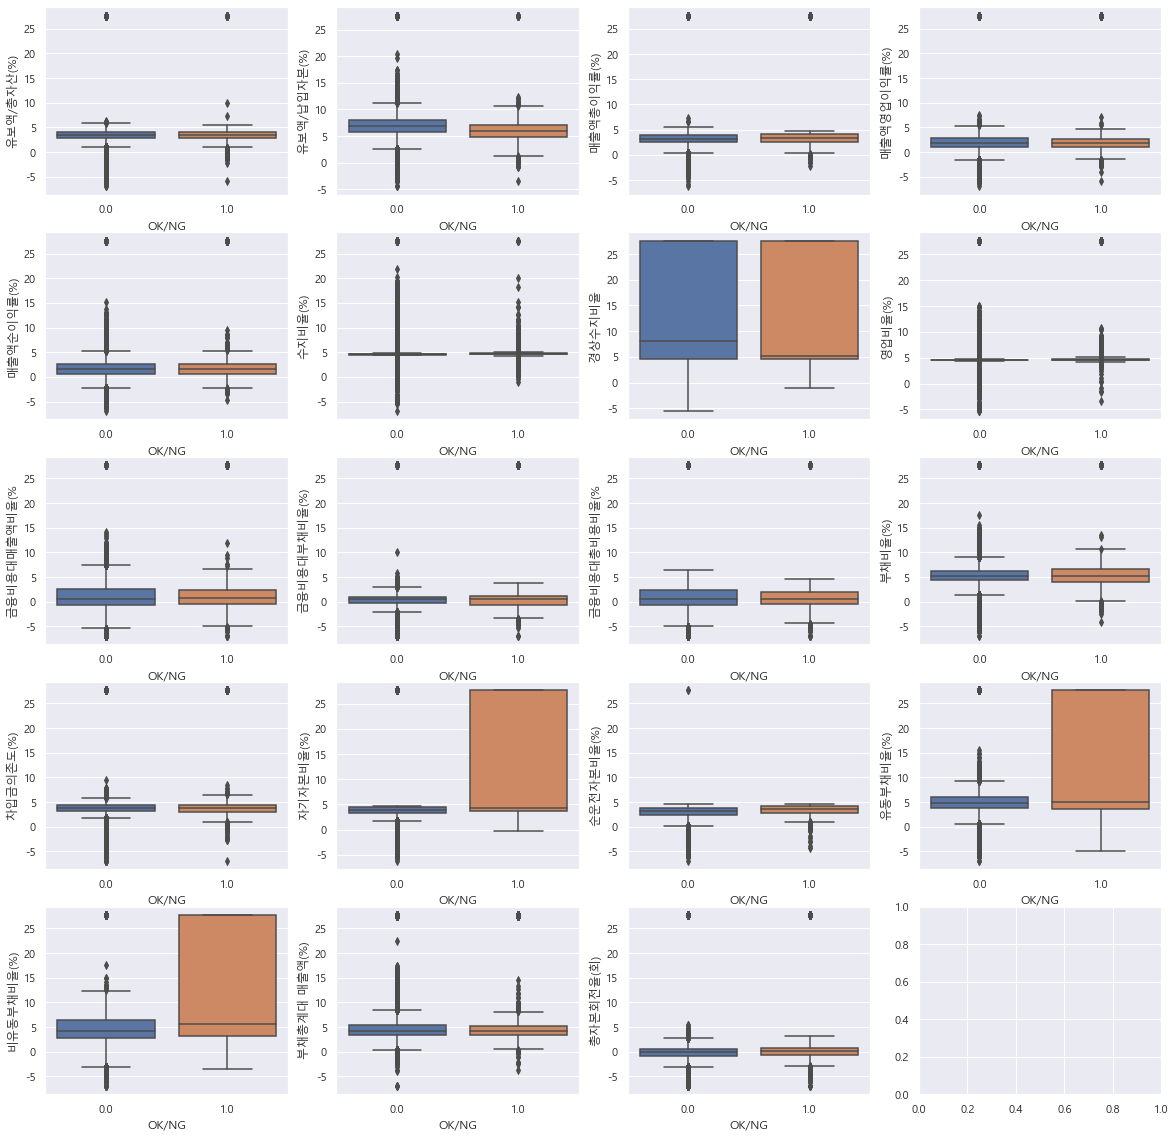

In [84]:
plt.rc('font', family='Malgun Gothic')
fig, axes = plt.subplots(5, 4, figsize=(20,20))

y = 0
for c_n in all_data.columns[52:71]:
    i, j = divmod(y, 4)
    sns.boxplot(x=all_data["OK/NG"], y=np.log(all_data[c_n]), ax=axes[i, j])
    y = y + 1

<AxesSubplot:>

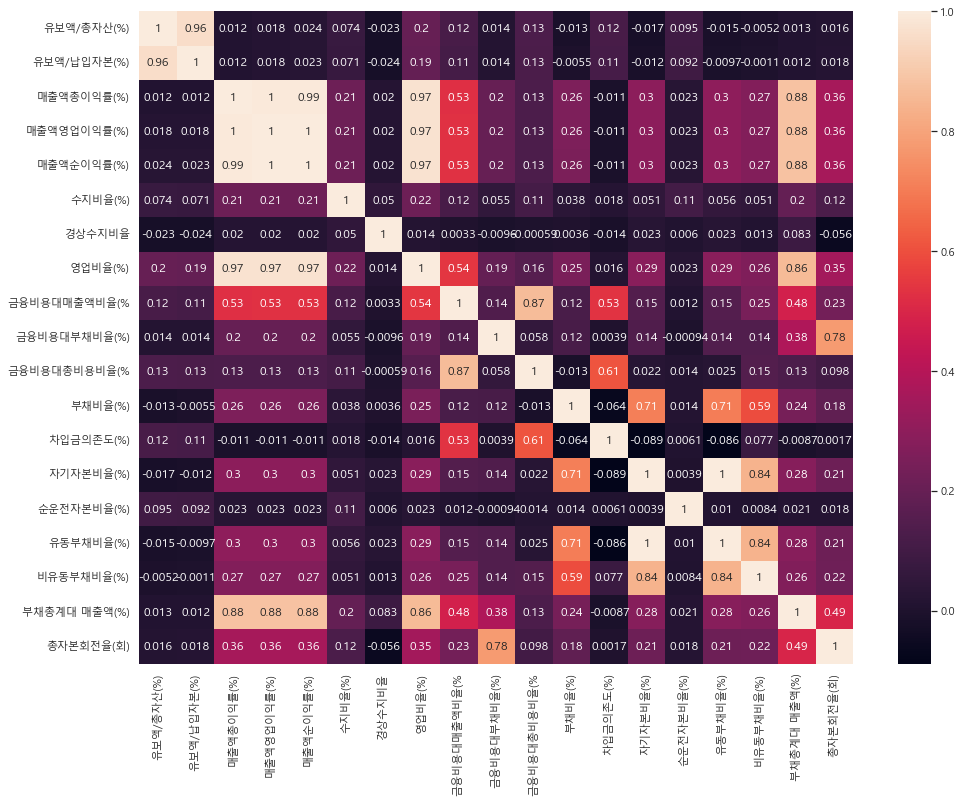

In [85]:
# 재무 데이터 간 상관계수 시각화 2
sns.set(rc={'figure.figsize':(16,12)})
plt.rc('font', family='Malgun Gothic')
sns.heatmap(all_data[all_data.columns[52:71]].corr(),annot=True)